In [1]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

data/sudoku_images/sudoku1.jpg


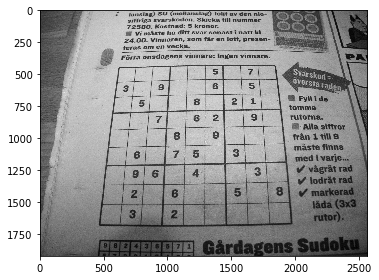

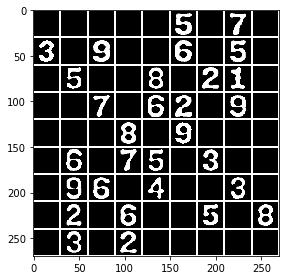

data/sudoku_images/sudoku10.jpg


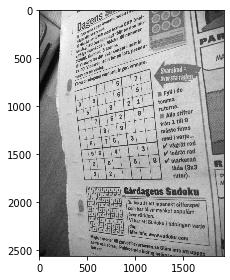

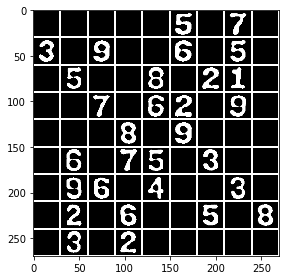

data/sudoku_images/sudoku11.jpg


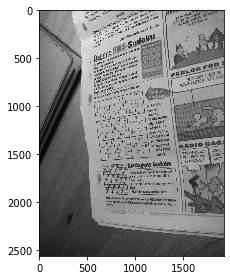

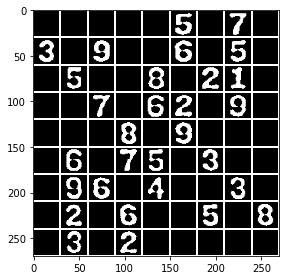

data/sudoku_images/sudoku12.jpg


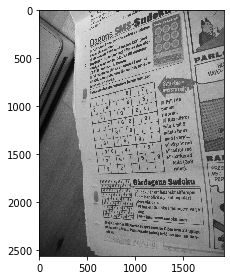

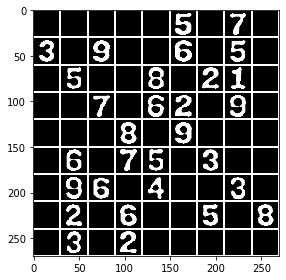

data/sudoku_images/sudoku13.jpg


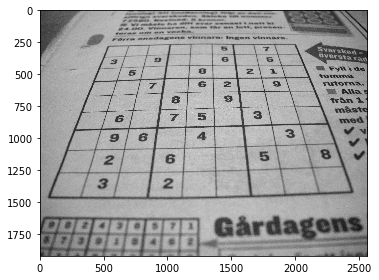

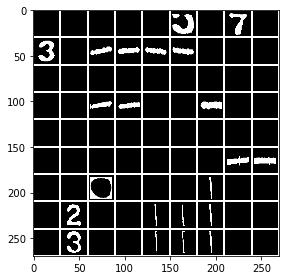

data/sudoku_images/sudoku14.jpg


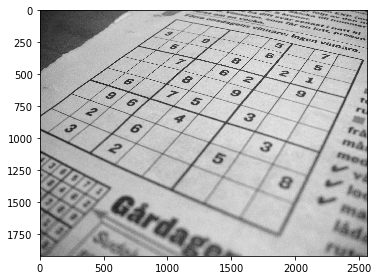

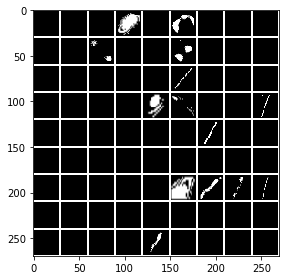

data/sudoku_images/sudoku15.jpg


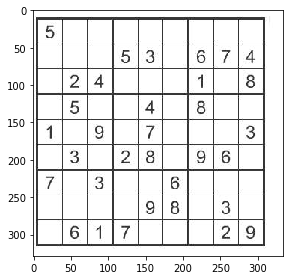

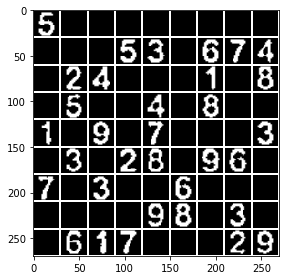

data/sudoku_images/sudoku16.jpg


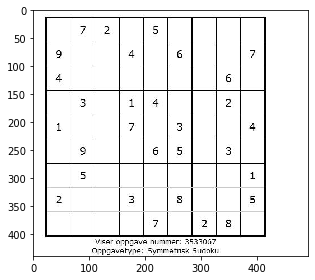

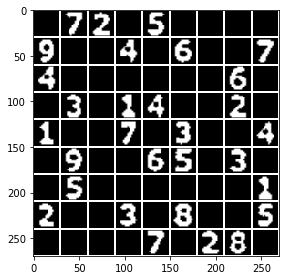

data/sudoku_images/sudoku17.jpg


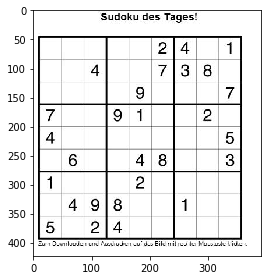

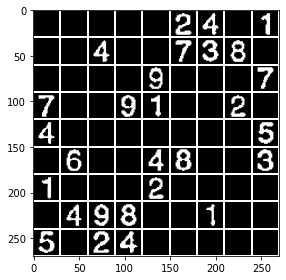

data/sudoku_images/sudoku18.jpg


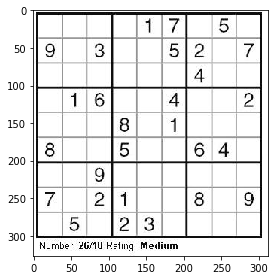

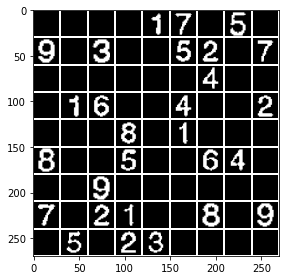

data/sudoku_images/sudoku19.jpg


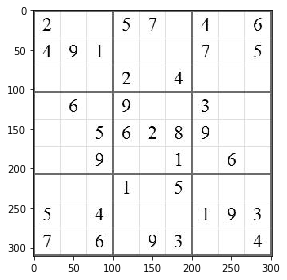

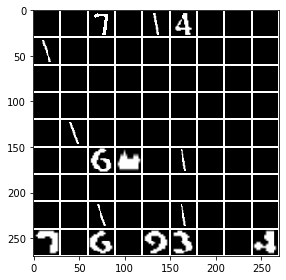

data/sudoku_images/sudoku2.jpg


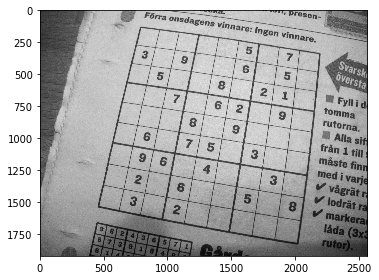

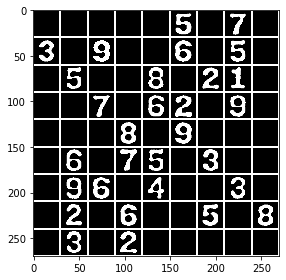

data/sudoku_images/sudoku20.jpg


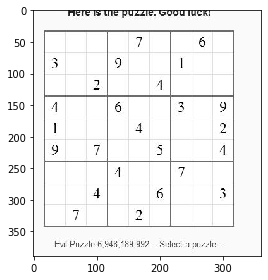

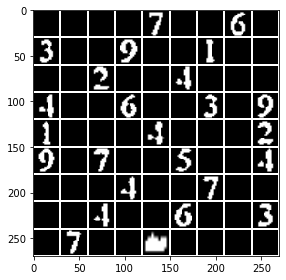

data/sudoku_images/sudoku21.jpg


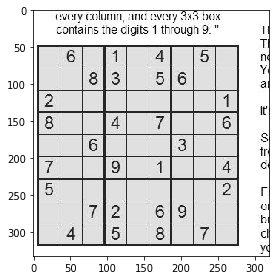

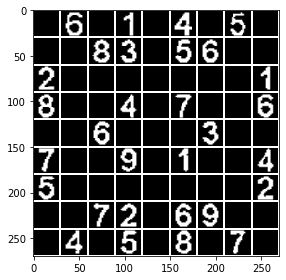

data/sudoku_images/sudoku22.jpg


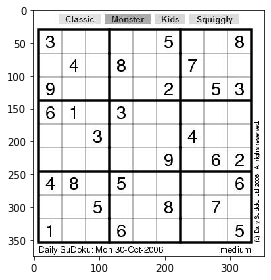

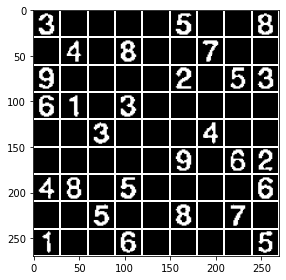

data/sudoku_images/sudoku23.jpg


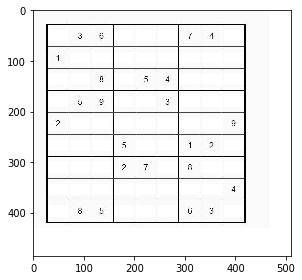

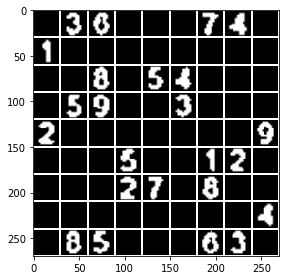

data/sudoku_images/sudoku24.jpg


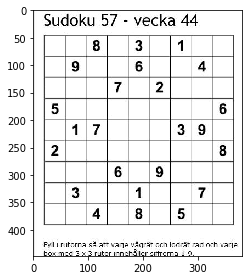

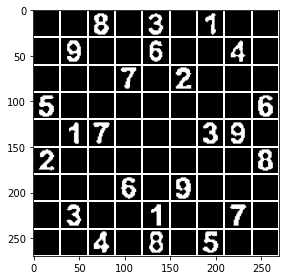

data/sudoku_images/sudoku25.jpg


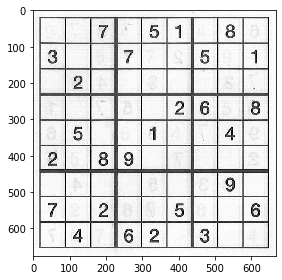

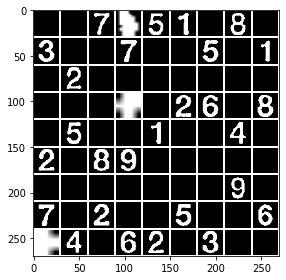

data/sudoku_images/sudoku26.jpg


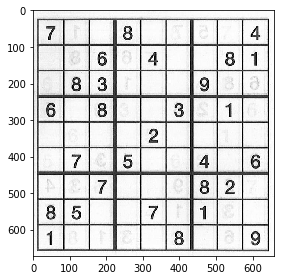

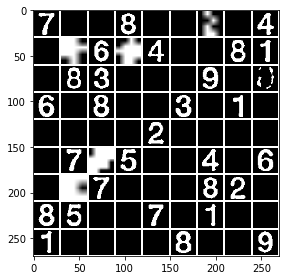

data/sudoku_images/sudoku27.jpg


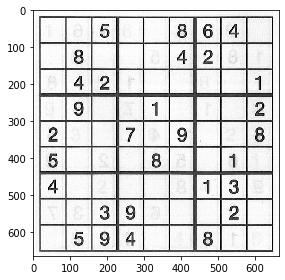

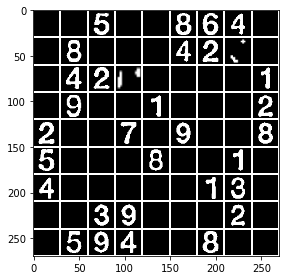

data/sudoku_images/sudoku28.jpg


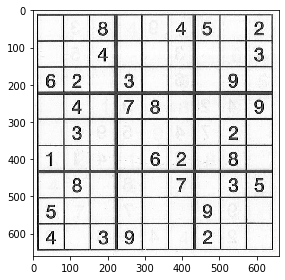

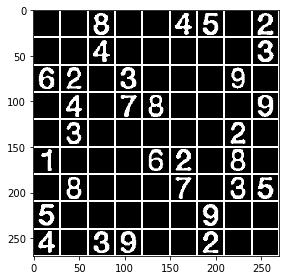

data/sudoku_images/sudoku29.jpg


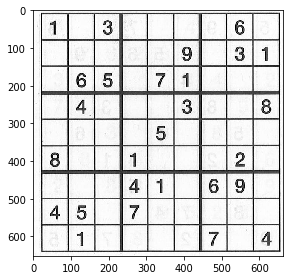

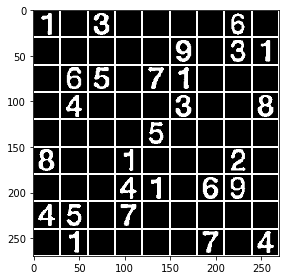

data/sudoku_images/sudoku3.jpg


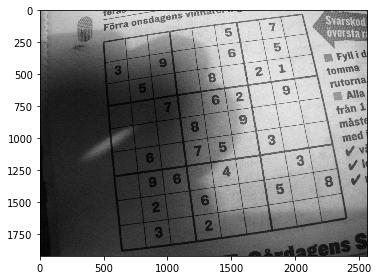

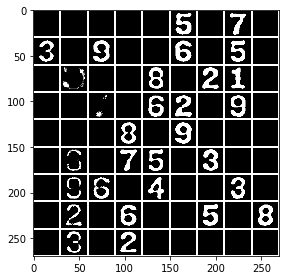

data/sudoku_images/sudoku30.jpg


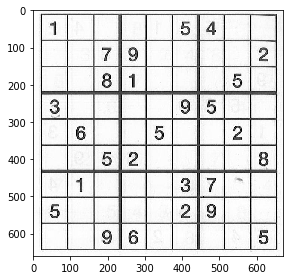

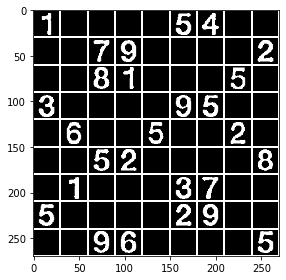

data/sudoku_images/sudoku31.jpg


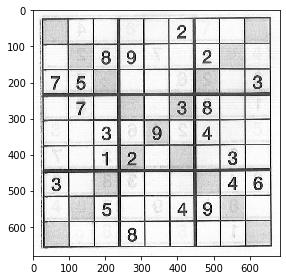

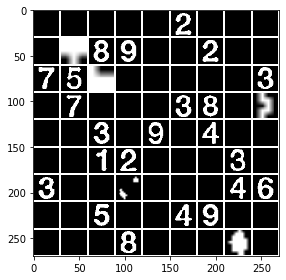

data/sudoku_images/sudoku32.jpg


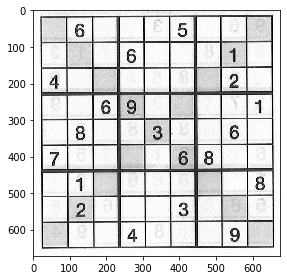

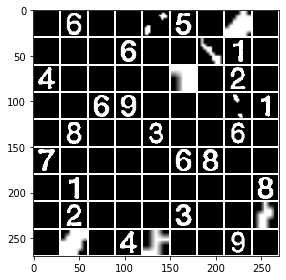

data/sudoku_images/sudoku33.jpg


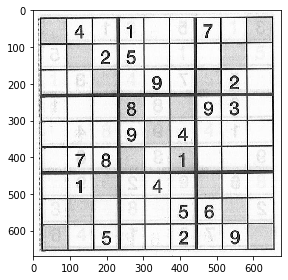

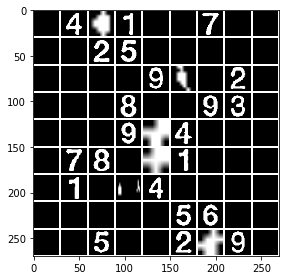

data/sudoku_images/sudoku34.jpg


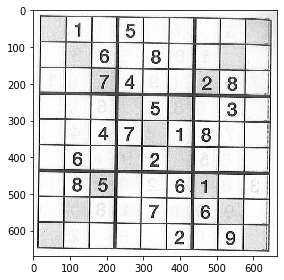

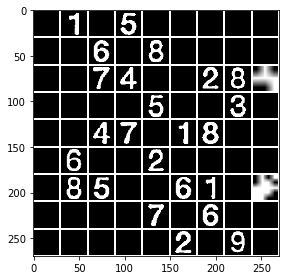

data/sudoku_images/sudoku35.jpg


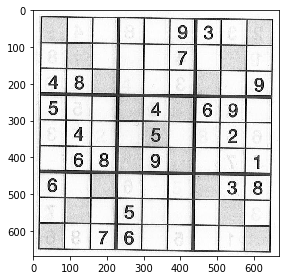

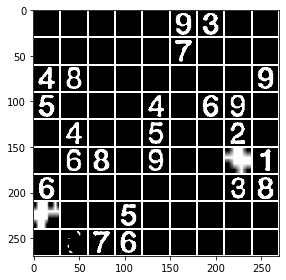

data/sudoku_images/sudoku36.jpg


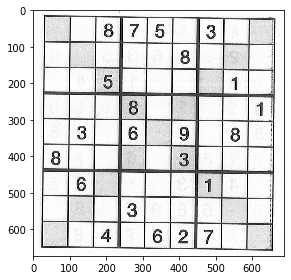

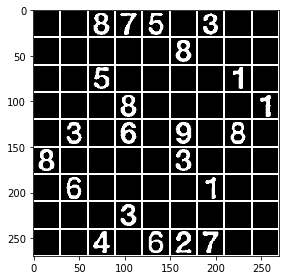

data/sudoku_images/sudoku37.jpg


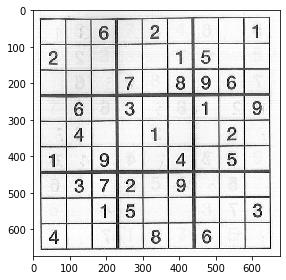

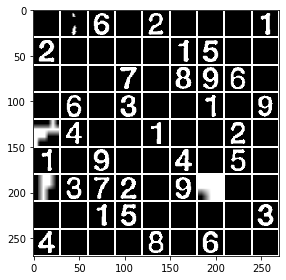

data/sudoku_images/sudoku38.jpg


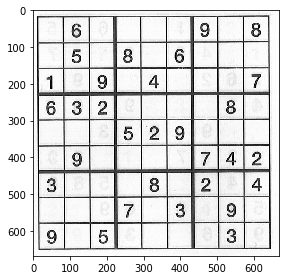

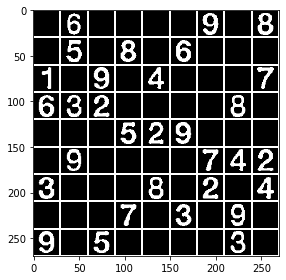

data/sudoku_images/sudoku39.jpg


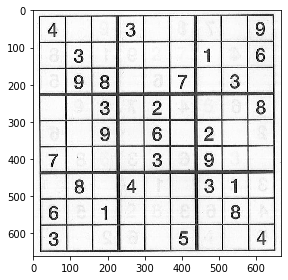

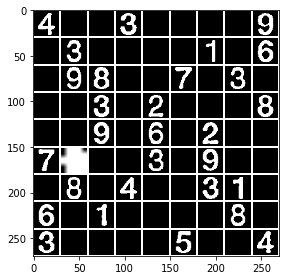

data/sudoku_images/sudoku4.jpg


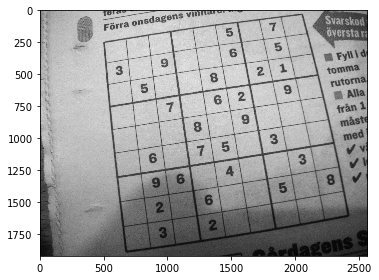

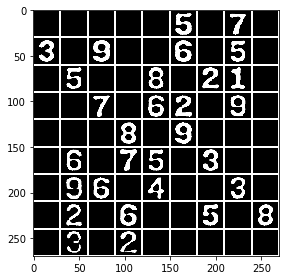

data/sudoku_images/sudoku40.jpg


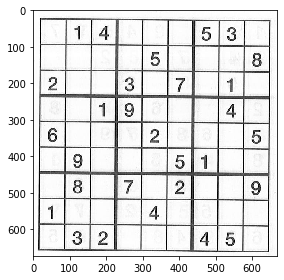

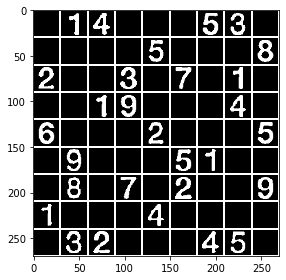

data/sudoku_images/sudoku41.jpg


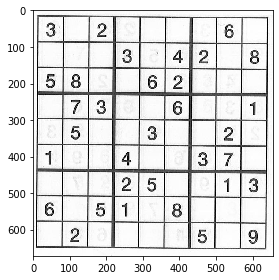

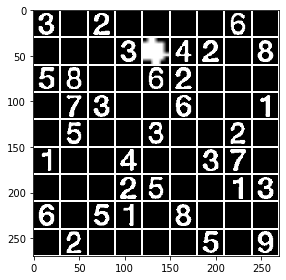

data/sudoku_images/sudoku42.jpg


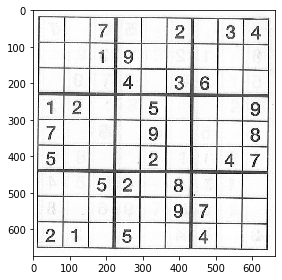

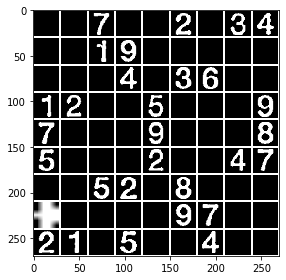

data/sudoku_images/sudoku43.jpg


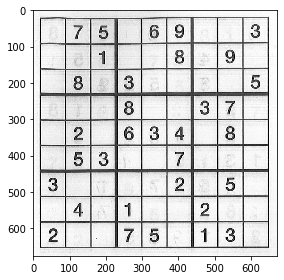

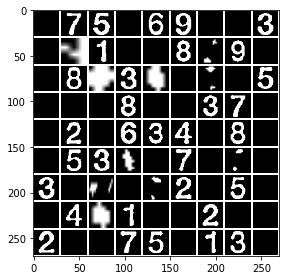

data/sudoku_images/sudoku44.jpg


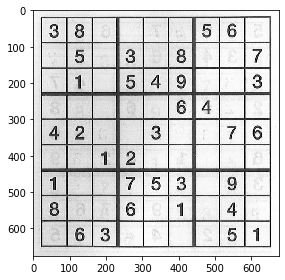

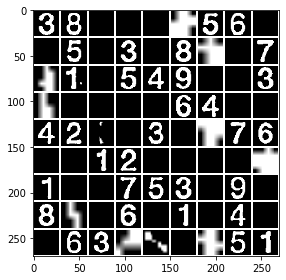

data/sudoku_images/sudoku45.jpg


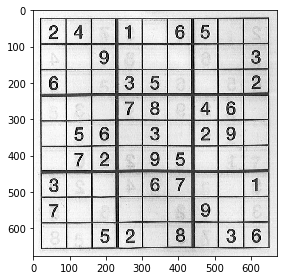

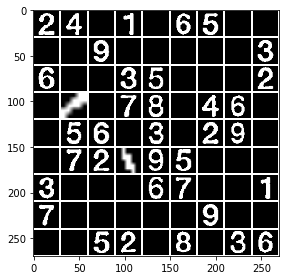

data/sudoku_images/sudoku46.jpg


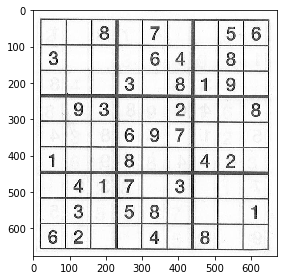

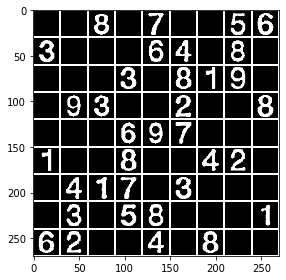

data/sudoku_images/sudoku47.jpg


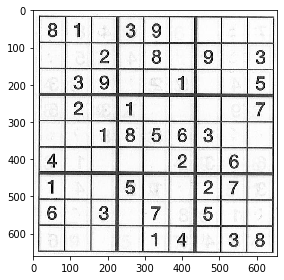

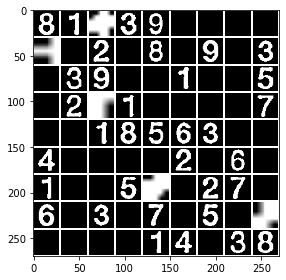

data/sudoku_images/sudoku48.jpg


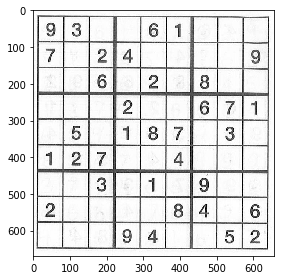

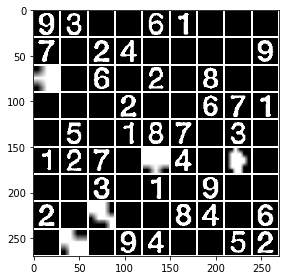

data/sudoku_images/sudoku49.jpg


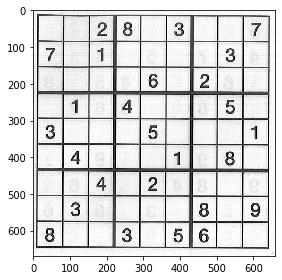

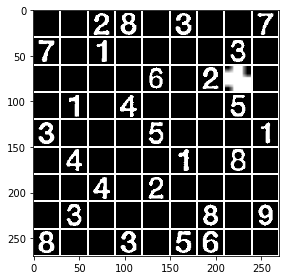

data/sudoku_images/sudoku5.jpg


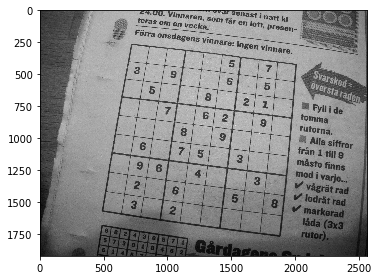

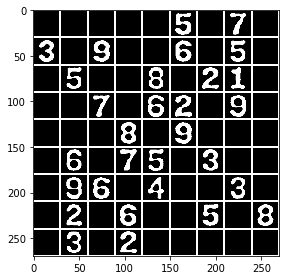

data/sudoku_images/sudoku50.jpg


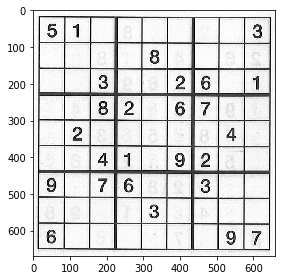

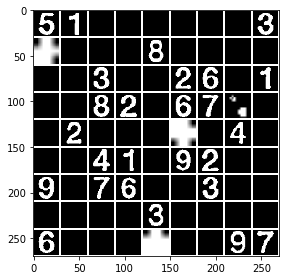

data/sudoku_images/sudoku51.jpg


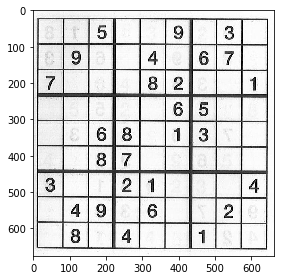

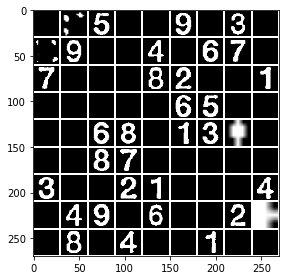

data/sudoku_images/sudoku52.jpg


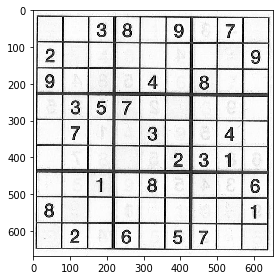

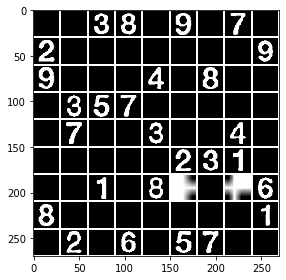

data/sudoku_images/sudoku53.jpg


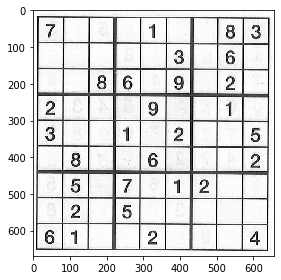

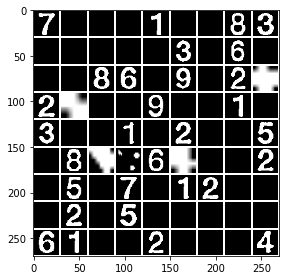

data/sudoku_images/sudoku54.jpg


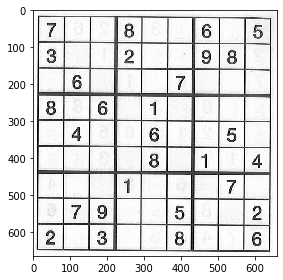

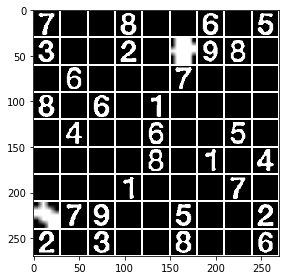

data/sudoku_images/sudoku55.jpg


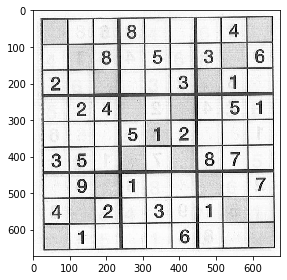

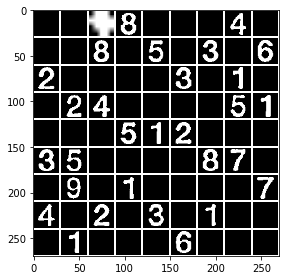

data/sudoku_images/sudoku56.jpg


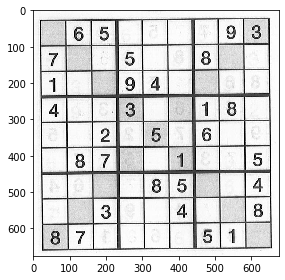

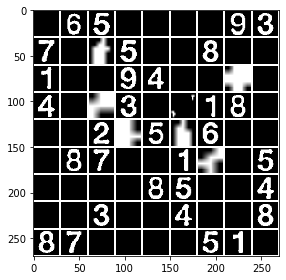

data/sudoku_images/sudoku57.jpg


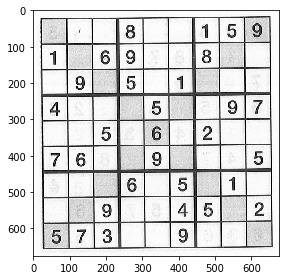

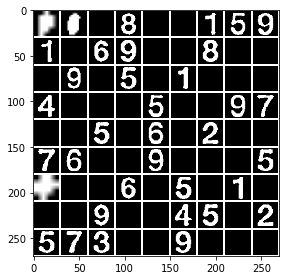

data/sudoku_images/sudoku58.jpg


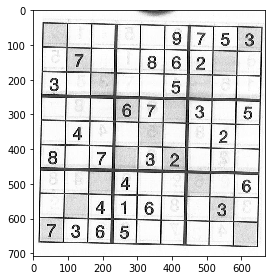

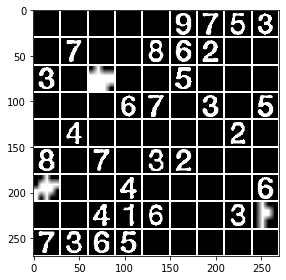

data/sudoku_images/sudoku59.jpg


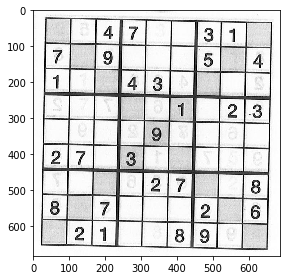

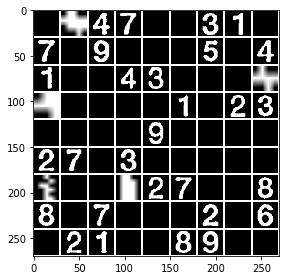

data/sudoku_images/sudoku6.jpg


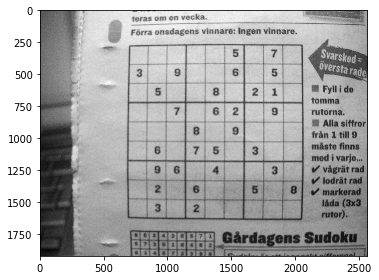

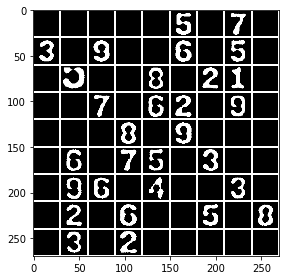

data/sudoku_images/sudoku60.jpg


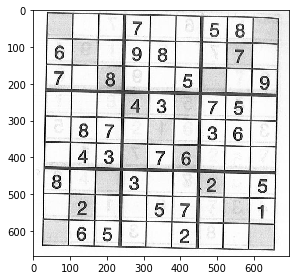

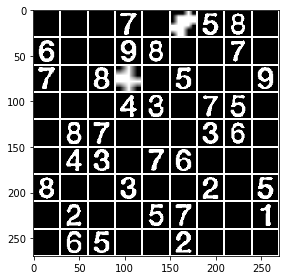

data/sudoku_images/sudoku7.jpg


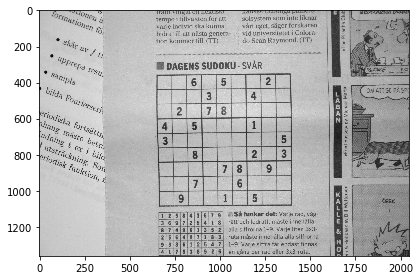

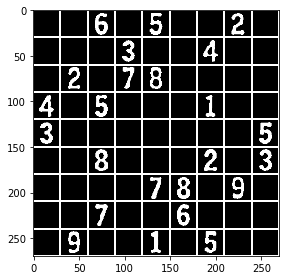

data/sudoku_images/sudoku8.jpg


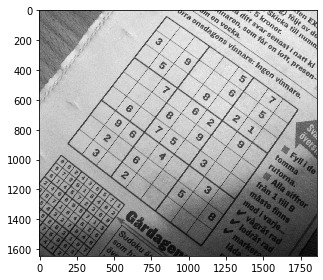

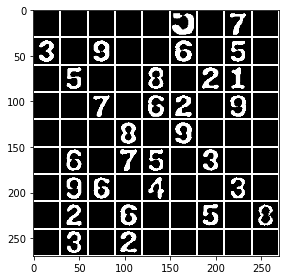

data/sudoku_images/sudoku9.jpg


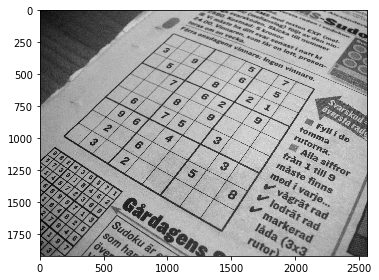

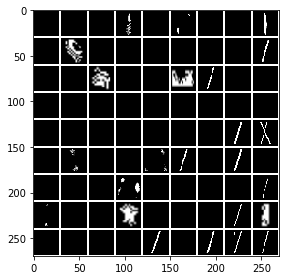

In [3]:
from sudoku.image_parser import parse_grid, load_image
from sudoku.plotting import image_from_digits, show_image

def is_image(file: str) -> bool: 
    return (
        file.endswith('.jpg') or 
        file.endswith('.jpeg') or 
        file.endswith('.png')
    )

directory = 'data/sudoku_images/'


def find_corners_crop_warp(img):
    corners = find_corners_of_largest_polygon(img)
    return crop_and_warp(img.copy(), corners)


for file in sorted(os.listdir(directory)):
    if is_image(file):
        path = directory + file
        print(path)
        
        img = load_image(path)        
        show_image(img)
         
        digits = parse_grid(img)
        show_image(image_from_digits(digits))
        input()
        

images/3-example.jpg
(4608, 3456)


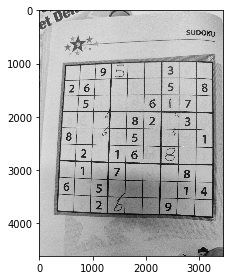

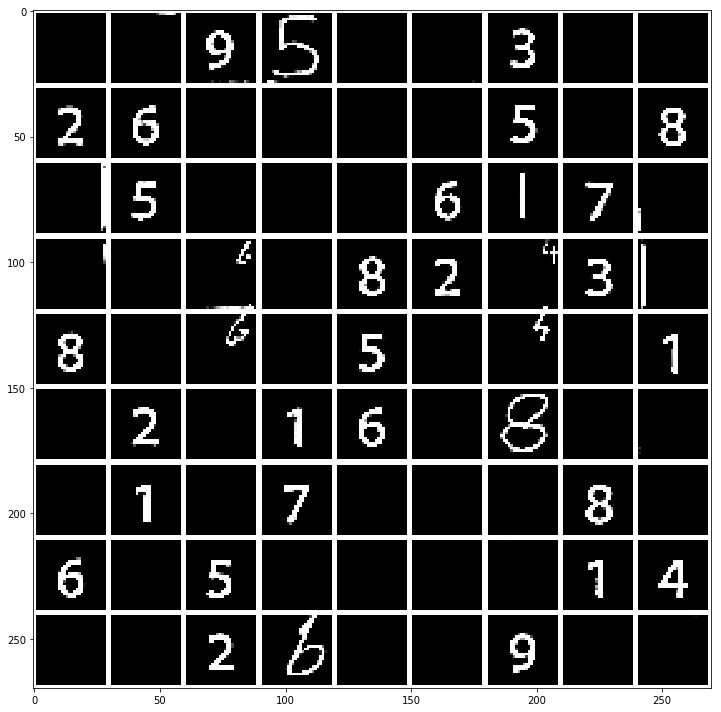

images/1-example.jpeg
(423, 419)


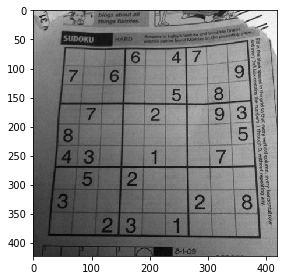

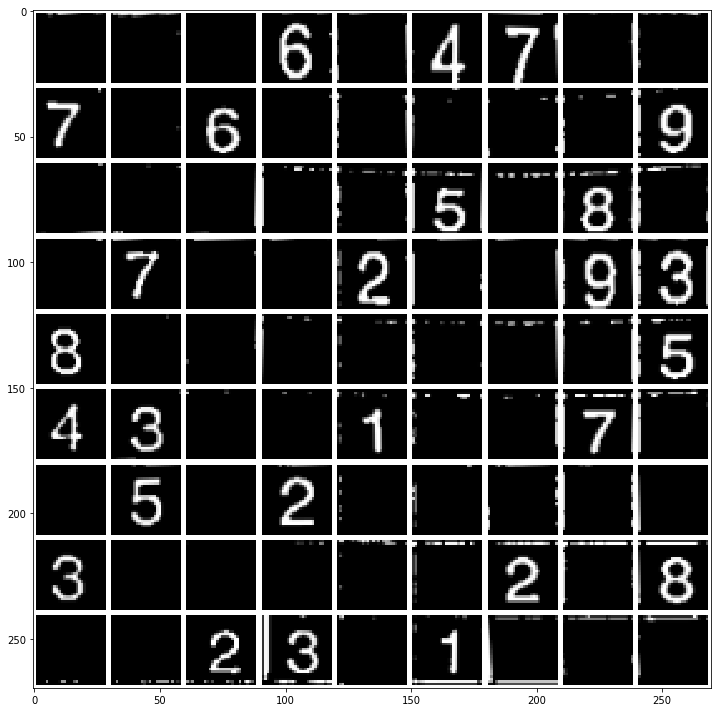

images/2-example.png
(200, 200)


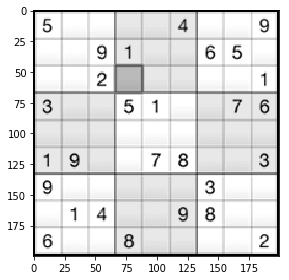

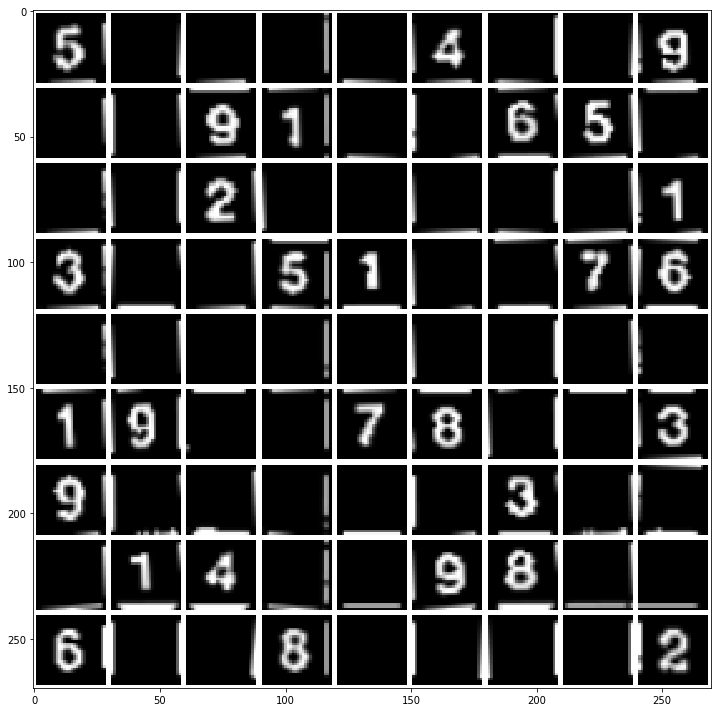

images/4.jpg
(1939, 2582)


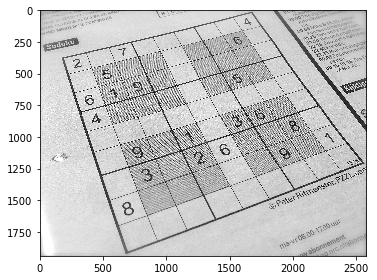

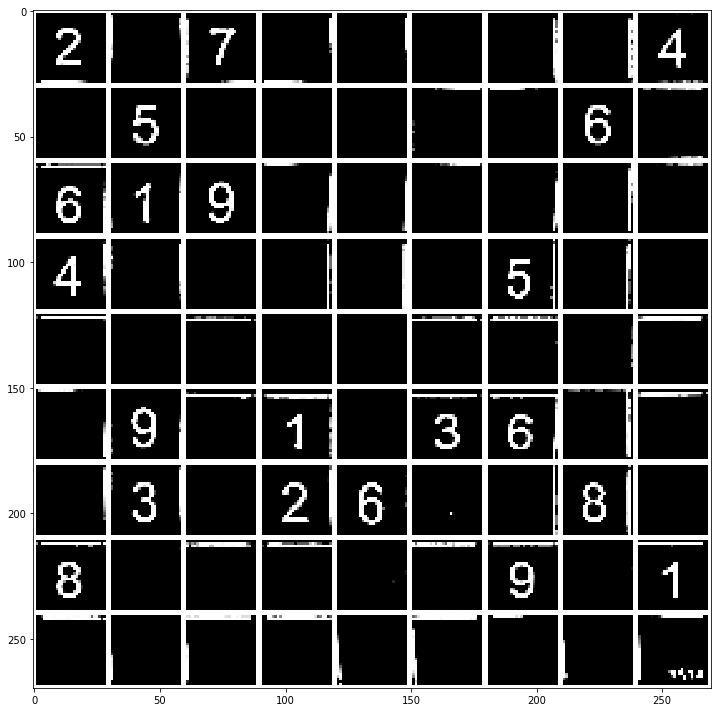

images/5.jpg
(200, 200)


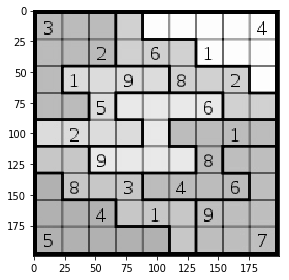

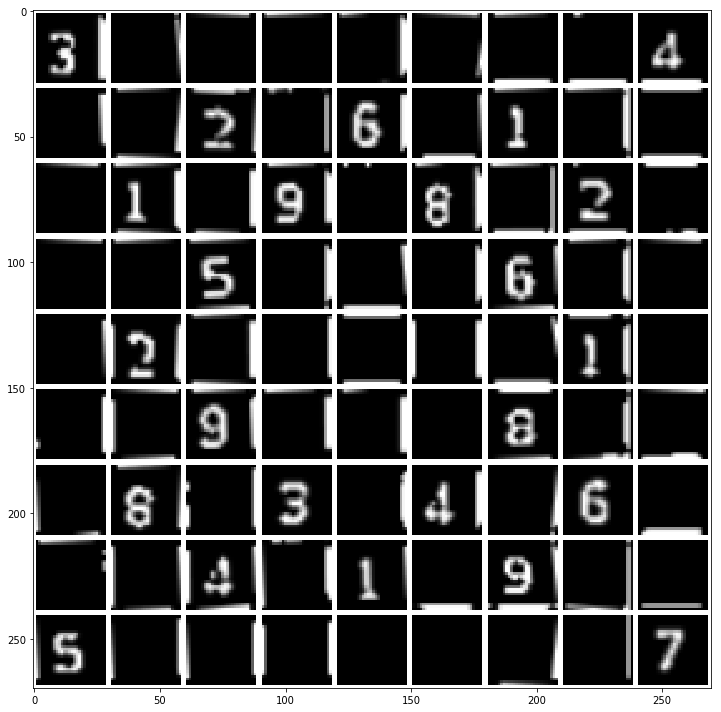

images/6.png
(200, 200)


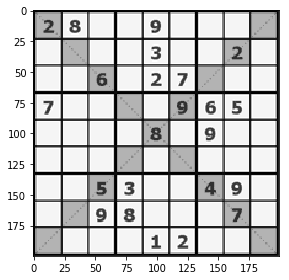

KeyboardInterrupt: 

In [120]:
from sudoku.image_parser import (
    load_image, 
    enhance_grid_lines,
    find_corners_of_largest_polygon,
    crop_and_warp,
    enhance_digits,
    extract_digits
)

from sudoku.plotting import (
    show_image,
    draw_points,
    draw_rects, 
    compound_digits
)

# for file in os.listdir(directory):
#     if is_image(file):
#         path = directory + file
#         print(path)
        
#         # Load image
#         img = load_image(path)
#         print(img.shape)
        
#         show_image(img)

#         # Enhance, find corners, crop and warp
#         enhanced_grid = enhance_grid_lines(img)
#         corners = find_corners_of_largest_polygon(enhanced_grid)
#         cropped = crop_and_warp(img, corners)
        
#         # Apply twice for good measure
#         enhanced_grid = enhance_grid_lines(cropped)
#         corners = find_corners_of_largest_polygon(enhanced_grid)
#         cropped = crop_and_warp(cropped, corners)
        
# #         show_image(cropped)
        
#         # Step 4 - enhance digits
#         enhanced_digits = enhance_digits(cropped)
        
# #         show_image(enhanced_digits, figsize=(10, 10))
        
#         digits = extract_digits(enhanced_digits)

#         show_image(compound_digits(digits), figsize=(10, 10))
# #         break

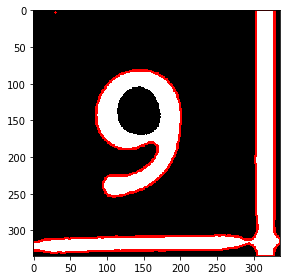

In [47]:
from sudoku.plotting import draw_contours

patch = patches[2].copy()

contours, hierarchy = cv2.findContours(
    patch.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

show_image(draw_contours(patch, contours))

contours = sorted(
    contours, key=cv2.contourArea, reverse=True
)  # Sort by area, descending

polygon = contours[0]  # Largest image

# Step 2 - find corners

# corners = find_corners_of_largest_polygon(cv2.bitwise_not(patch.copy(), patch.copy()))
# show_image(draw_points(patch, corners), figsize=(10, 10)) 

# # Step 3 - apply crop and warp
# cropped = crop_and_warp(patch, corners)
# show_image(cropped)

# show_image(cv2.resize(cropped, (28, 28)))

In [48]:
len(polygon)

155

In [41]:
len(contours)

3

In [42]:
len(contours[0])

276

In [43]:
len(contours[1])

1

In [44]:
len(contours[2])

155

In [38]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [-1,  1, -1, -1]]], dtype=int32)

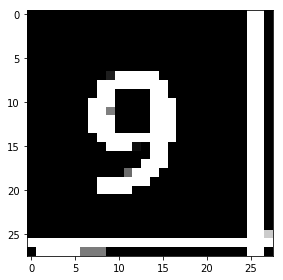

In [20]:
show_image(cv2.resize(patch, (28, 28)))